In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Model 1 (TDS+EC+TS+DO)

In [2]:
df = pd.read_csv("DOE_2.csv")
df.head()

,Year,Sample Location,Temp,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l),Salinity(%),month
0,2017,CUFL,22.2,8.1,20450.0,10414.0,10228.0,186.0,5.6,14.2,1
1,2017,TSP,22.2,7.9,19984.0,10190.0,9992.0,198.0,6.1,13.8,1
2,2017,CUFL,21.1,7.3,22580.0,11494.0,11292.0,202.0,4.8,14.8,2
3,2017,TSP,21.1,7.9,21356.0,10906.0,10678.0,228.0,5.4,13.6,2
4,2017,TSP,25.6,7.3,26330.0,13476.0,13168.0,308.0,6.1,17.2,3


In [3]:
df = df.drop(['Year','Sample Location','Temp','PH','SS(mg/l)','month'],axis='columns')   #input
df.head()

,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l),Salinity(%)
0,20450.0,10414.0,10228.0,5.6,14.2
1,19984.0,10190.0,9992.0,6.1,13.8
2,22580.0,11494.0,11292.0,4.8,14.8
3,21356.0,10906.0,10678.0,5.4,13.6
4,26330.0,13476.0,13168.0,6.1,17.2


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale
columns_to_scale = ['EC(µS/cm)', 'TS(mg/l)', 'TDS(mg/l)', 'DO(mg/l)', 'Salinity(%)']


df2 = df.copy()

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the specified columns in the copied DataFrame
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df2.head()

,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l),Salinity(%)
0,0.492862,0.458941,0.459217,0.546485,0.483100
1,0.481577,0.448940,0.448571,0.603175,0.469443
2,0.544443,0.507162,0.507216,0.455782,0.503585
3,0.514802,0.480908,0.479517,0.523810,0.462615
4,0.635255,0.595655,0.591844,0.603175,0.585524


In [5]:
X = df2.drop(['Salinity(%)'],axis='columns')   #input
y = df2['Salinity(%)'] 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [7]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9117444189418062

In [8]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.94195408, 0.95943122, 0.9538162 , 0.91332309, 0.86880371])

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a LinearRegression instance
lr_clf = LinearRegression()

# Fit the Linear Regression model to the training data
lr_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_clf.predict(X_test)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the R² and RMSE scores
print("R-squared (R²) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²) Score: 0.9117444189418062
Root Mean Squared Error (RMSE): 0.07433204670496135


In [10]:
def nash_sutcliffe_efficiency(y_true, y_pred):
    mean_observed = np.mean(y_true)
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - mean_observed) ** 2)
    nse = 1 - (numerator / denominator)
    return nse
nse = nash_sutcliffe_efficiency(y_test, y_pred)
print (nse)

0.9117444189418062


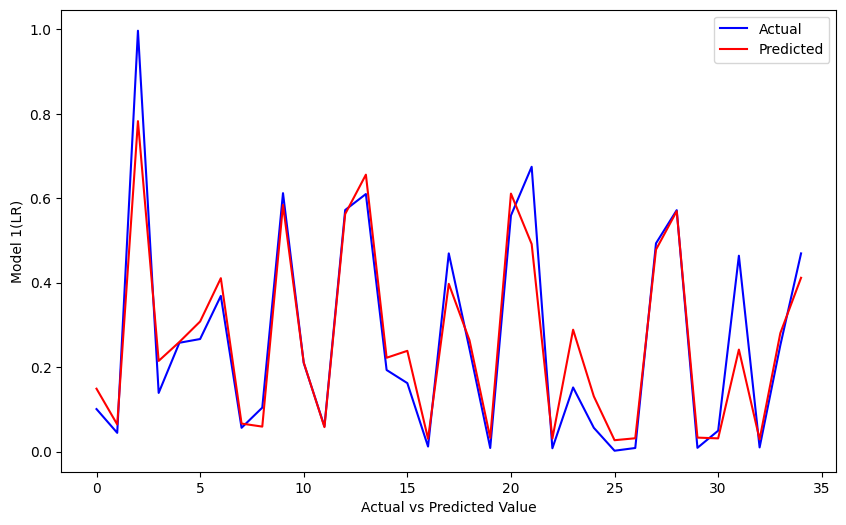

In [11]:
import matplotlib.pyplot as plt

# Assuming you have actual values in 'y_test' and predicted values in 'y_pred'

# Create a range of indices to use as x-axis
indices = range(len(y_test))

# Create a line plot for actual values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', color='blue')

# Create a line plot for predicted values
plt.plot(indices, y_pred, label='Predicted', color='red')

# Set labels and legend
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Model 1(LR)')
plt.legend(loc='best')

# Show the plot
plt.show()


In [12]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(random_state=0)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9246259756636628

In [13]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(RandomForestRegressor(random_state=0), X, y, cv=cv)

array([0.95545743, 0.95077699, 0.95639267, 0.93795328, 0.8806461 ])

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a LinearRegression instance
rf_clf = RandomForestRegressor(random_state=0)

# Fit the Linear Regression model to the training data
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_clf.predict(X_test)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print the R² and RMSE scores
print("R-squared (R²) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²) Score: 0.9246259756636628
Root Mean Squared Error (RMSE): 0.06869353304416947


In [15]:
def nash_sutcliffe_efficiency(y_true, y_pred_rf):
    mean_observed = np.mean(y_true)
    numerator = np.sum((y_true - y_pred_rf) ** 2)
    denominator = np.sum((y_true - mean_observed) ** 2)
    nse = 1 - (numerator / denominator)
    return nse
nse = nash_sutcliffe_efficiency(y_test, y_pred_rf)
print (nse)

0.9246259756636628


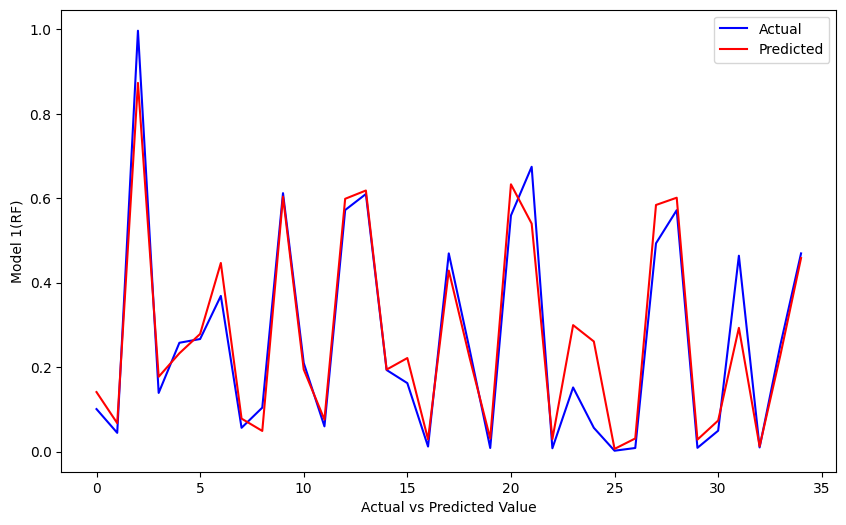

In [16]:
import matplotlib.pyplot as plt

# Assuming you have actual values in 'y_test' and predicted values in 'y_pred'

# Create a range of indices to use as x-axis
indices = range(len(y_test))

# Create a line plot for actual values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', color='blue')

# Create a line plot for predicted values
plt.plot(indices, y_pred_rf, label='Predicted', color='red')

# Set labels and legend
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Model 1(RF)')
plt.legend(loc='best')

# Show the plot
plt.show()


In [17]:
from sklearn.ensemble import GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(random_state=0)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.9455455041587444

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(GradientBoostingRegressor(random_state=0), X, y, cv=cv)

array([0.93976555, 0.93941635, 0.93588867, 0.93586643, 0.87193816])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a LinearRegression instance
gb_clf = GradientBoostingRegressor(random_state=0)

# Fit the Linear Regression model to the training data
gb_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_clf.predict(X_test)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred_gb)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Print the R² and RMSE scores
print("R-squared (R²) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²) Score: 0.9455455041587444
Root Mean Squared Error (RMSE): 0.058387767846820385


In [20]:
def nash_sutcliffe_efficiency(y_true, y_pred_gb):
    mean_observed = np.mean(y_true)
    numerator = np.sum((y_true - y_pred_gb) ** 2)
    denominator = np.sum((y_true - mean_observed) ** 2)
    nse = 1 - (numerator / denominator)
    return nse
nse = nash_sutcliffe_efficiency(y_test, y_pred_gb)
print (nse)

0.9455455041587444


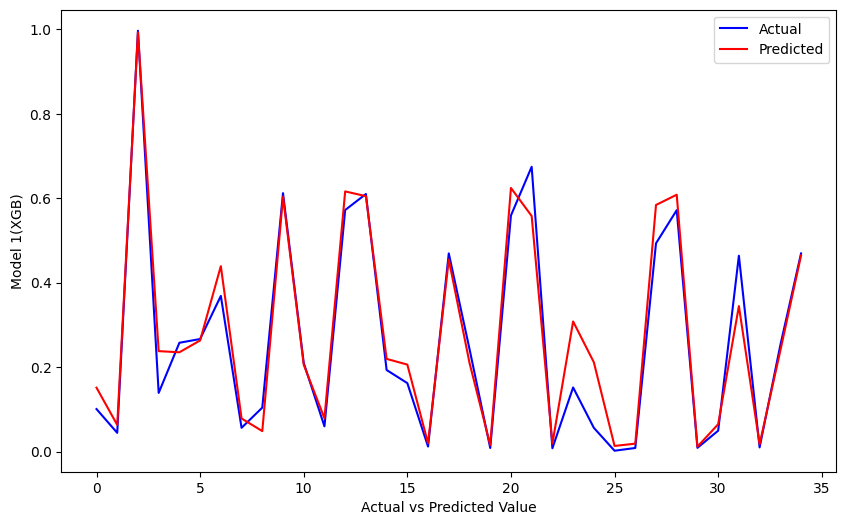

In [21]:
import matplotlib.pyplot as plt

# Assuming you have actual values in 'y_test' and predicted values in 'y_pred'

# Create a range of indices to use as x-axis
indices = range(len(y_test))

# Create a line plot for actual values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', color='blue')

# Create a line plot for predicted values
plt.plot(indices, y_pred_gb, label='Predicted', color='red')

# Set labels and legend
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Model 1(XGB)')
plt.legend(loc='best')

# Show the plot
plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor(random_state=0)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.9006389047757335

In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cross_val_score(DecisionTreeRegressor(random_state=0), X, y, cv=cv)

array([0.84637651, 0.85297841, 0.87591071, 0.8361516 , 0.85350603])

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a LinearRegression instance
dt_clf = DecisionTreeRegressor(random_state=0)

# Fit the Linear Regression model to the training data
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = gb_clf.predict(X_test)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Print the R² and RMSE scores
print("R-squared (R²) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²) Score: 0.9455455041587444
Root Mean Squared Error (RMSE): 0.058387767846820385


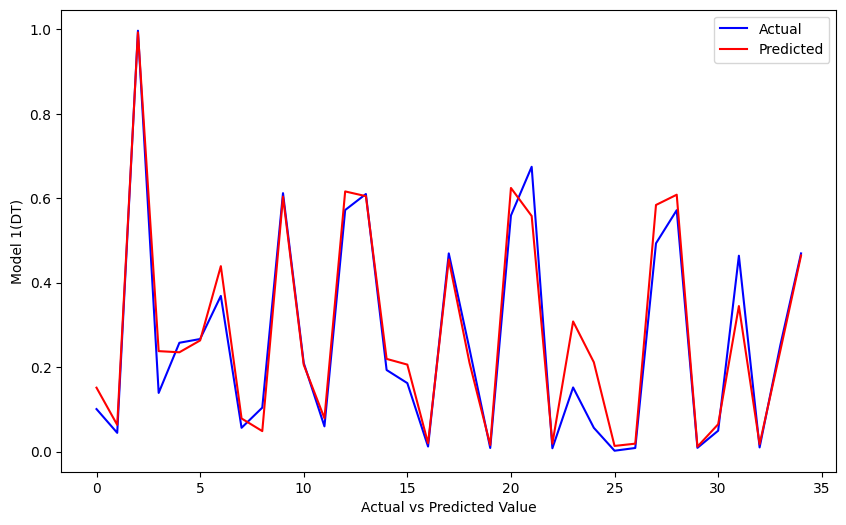

In [25]:
import matplotlib.pyplot as plt

# Assuming you have actual values in 'y_test' and predicted values in 'y_pred'

# Create a range of indices to use as x-axis
indices = range(len(y_test))

# Create a line plot for actual values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', color='blue')

# Create a line plot for predicted values
plt.plot(indices, y_pred_dt, label='Predicted', color='red')

# Set labels and legend
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Model 1(DT)')
plt.legend(loc='best')

# Show the plot
plt.show()

In [26]:
%pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from tabulate import tabulate

# Create instances of regression models
lr_clf = LinearRegression()
rf_clf = RandomForestRegressor(random_state=0)
gb_clf = GradientBoostingRegressor(random_state=0)
dt_clf = DecisionTreeRegressor(random_state=0)

# Fit the models to the training data
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)

# Calculate R-squared (R²) scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE) scores
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Create a table
table = [
    ["Algorithm", "Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    ["R-squared (R²)", r2_lr, r2_rf, r2_gb, r2_dt],
    ["RMSE", rmse_lr, rmse_rf, rmse_gb, rmse_dt]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒════════════════╤═════════════════════╤═════════════════╤═════════════════════╤═════════════════╕
│ Algorithm      │   Linear Regression │   Random Forest │   Gradient Boosting │   Decision Tree │
╞════════════════╪═════════════════════╪═════════════════╪═════════════════════╪═════════════════╡
│ R-squared (R²) │            0.911744 │       0.924626  │           0.945546  │       0.900639  │
├────────────────┼─────────────────────┼─────────────────┼─────────────────────┼─────────────────┤
│ RMSE           │            0.074332 │       0.0686935 │           0.0583878 │       0.0788702 │
╘════════════════╧═════════════════════╧═════════════════╧═════════════════════╧═════════════════╛


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from tabulate import tabulate

# Create instances of regression models
lr_clf = LinearRegression()
rf_clf = RandomForestRegressor(random_state=0)
gb_clf = GradientBoostingRegressor(random_state=0)
dt_clf = DecisionTreeRegressor(random_state=0)

# Fit the models to the training data
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)

# Calculate R-squared (R²) scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE) scores
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Calculate Nash-Sutcliffe Efficiency (NSE) scores
nse_lr = 1 - (np.sum((y_test - y_pred_lr) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
nse_rf = 1 - (np.sum((y_test - y_pred_rf) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
nse_gb = 1 - (np.sum((y_test - y_pred_gb) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
nse_dt = 1 - (np.sum((y_test - y_pred_dt) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Create a table
table = [
    ["Algorithm", "Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    ["R-squared (R²)", r2_lr, r2_rf, r2_gb, r2_dt],
    ["RMSE", rmse_lr, rmse_rf, rmse_gb, rmse_dt],
    ["NSE", nse_lr, nse_rf, nse_gb, nse_dt]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒════════════════╤═════════════════════╤═════════════════╤═════════════════════╤═════════════════╕
│ Algorithm      │   Linear Regression │   Random Forest │   Gradient Boosting │   Decision Tree │
╞════════════════╪═════════════════════╪═════════════════╪═════════════════════╪═════════════════╡
│ R-squared (R²) │            0.911744 │       0.924626  │           0.945546  │       0.900639  │
├────────────────┼─────────────────────┼─────────────────┼─────────────────────┼─────────────────┤
│ RMSE           │            0.074332 │       0.0686935 │           0.0583878 │       0.0788702 │
├────────────────┼─────────────────────┼─────────────────┼─────────────────────┼─────────────────┤
│ NSE            │            0.911744 │       0.924626  │           0.945546  │       0.900639  │
╘════════════════╧═════════════════════╧═════════════════╧═════════════════════╧═════════════════╛


In [29]:
import pandas as pd

# Create the table as a list of lists
table = [
    ["Algorithm", "Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    ["R-squared (R²)", r2_lr, r2_rf, r2_gb, r2_dt],
    ["RMSE", rmse_lr, rmse_rf, rmse_gb, rmse_dt],
    ["NSE", nse_lr, nse_rf, nse_gb, nse_dt]
]

# Convert the table to a DataFrame
df = pd.DataFrame(table[1:], columns=table[0])

# Save the DataFrame to a CSV file
df.to_csv('regression_scores.csv', index=False)


## Model 2 (TDS+EC+TS)

In [30]:
X = df2.drop(['Salinity(%)', 'DO(mg/l)'],axis='columns')   #input
y = df2['Salinity(%)'] 

In [31]:
X.head()


,EC(µS/cm),TS(mg/l),TDS(mg/l)
0,0.492862,0.458941,0.459217
1,0.481577,0.448940,0.448571
2,0.544443,0.507162,0.507216
3,0.514802,0.480908,0.479517
4,0.635255,0.595655,0.591844


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [33]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9122518607289083

In [34]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.94312237, 0.95980603, 0.95587308, 0.91352612, 0.87045521])

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a LinearRegression instance
lr_clf = LinearRegression()

# Fit the Linear Regression model to the training data
lr_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_clf.predict(X_test)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the R² and RMSE scores
print("R-squared (R²) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²) Score: 0.9122518607289083
Root Mean Squared Error (RMSE): 0.07411804572645299


In [36]:
def nash_sutcliffe_efficiency(y_true, y_pred):
    mean_observed = np.mean(y_true)
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - mean_observed) ** 2)
    nse = 1 - (numerator / denominator)
    return nse
nse = nash_sutcliffe_efficiency(y_test, y_pred)
print (nse)

0.9122518607289083


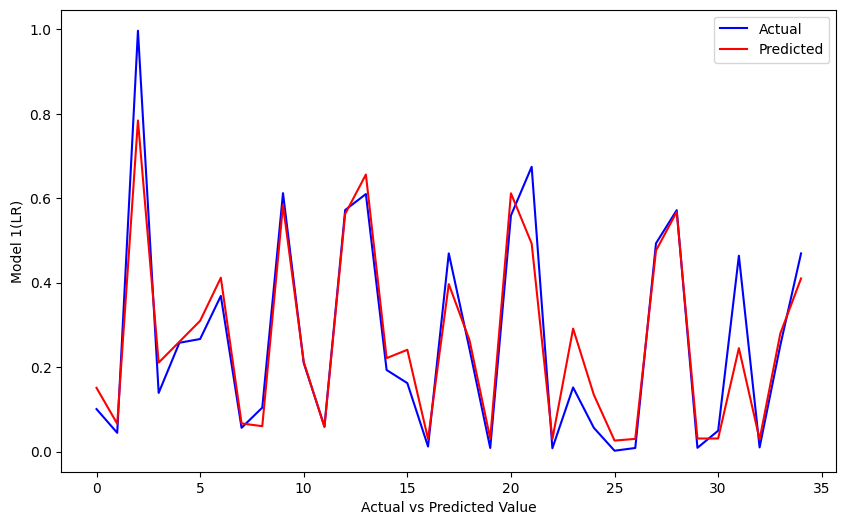

In [37]:
import matplotlib.pyplot as plt

# Assuming you have actual values in 'y_test' and predicted values in 'y_pred'

# Create a range of indices to use as x-axis
indices = range(len(y_test))

# Create a line plot for actual values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', color='blue')

# Create a line plot for predicted values
plt.plot(indices, y_pred, label='Predicted', color='red')

# Set labels and legend
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Model 1(LR)')
plt.legend(loc='best')

# Show the plot
plt.show()


In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(random_state=0)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9171210344184269

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(RandomForestRegressor(random_state=0), X, y, cv=cv)

array([0.95150419, 0.94817716, 0.95285904, 0.93257742, 0.87889039])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a LinearRegression instance
rf_clf = RandomForestRegressor(random_state=0)

# Fit the Linear Regression model to the training data
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_clf.predict(X_test)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print the R² and RMSE scores
print("R-squared (R²) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²) Score: 0.9171210344184269
Root Mean Squared Error (RMSE): 0.07203228021516879


In [41]:
def nash_sutcliffe_efficiency(y_true, y_pred_rf):
    mean_observed = np.mean(y_true)
    numerator = np.sum((y_true - y_pred_rf) ** 2)
    denominator = np.sum((y_true - mean_observed) ** 2)
    nse = 1 - (numerator / denominator)
    return nse
nse = nash_sutcliffe_efficiency(y_test, y_pred_rf)
print (nse)

0.9171210344184269


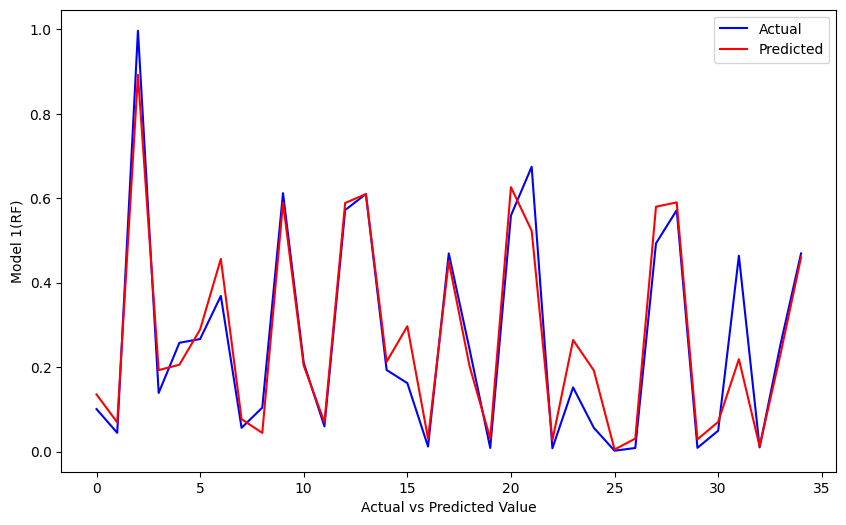

In [42]:
import matplotlib.pyplot as plt

# Assuming you have actual values in 'y_test' and predicted values in 'y_pred'

# Create a range of indices to use as x-axis
indices = range(len(y_test))

# Create a line plot for actual values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', color='blue')

# Create a line plot for predicted values
plt.plot(indices, y_pred_rf, label='Predicted', color='red')

# Set labels and legend
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Model 1(RF)')
plt.legend(loc='best')

# Show the plot
plt.show()


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(random_state=0)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.9412868910128721

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(GradientBoostingRegressor(random_state=0), X, y, cv=cv)

array([0.94182442, 0.93265427, 0.94112505, 0.93663158, 0.90768819])

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a LinearRegression instance
gb_clf = GradientBoostingRegressor(random_state=0)

# Fit the Linear Regression model to the training data
gb_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_clf.predict(X_test)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred_gb)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Print the R² and RMSE scores
print("R-squared (R²) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²) Score: 0.9412868910128721
Root Mean Squared Error (RMSE): 0.06062790210810398


In [46]:
def nash_sutcliffe_efficiency(y_true, y_pred_gb):
    mean_observed = np.mean(y_true)
    numerator = np.sum((y_true - y_pred_gb) ** 2)
    denominator = np.sum((y_true - mean_observed) ** 2)
    nse = 1 - (numerator / denominator)
    return nse
nse = nash_sutcliffe_efficiency(y_test, y_pred_gb)
print (nse)

0.9412868910128721


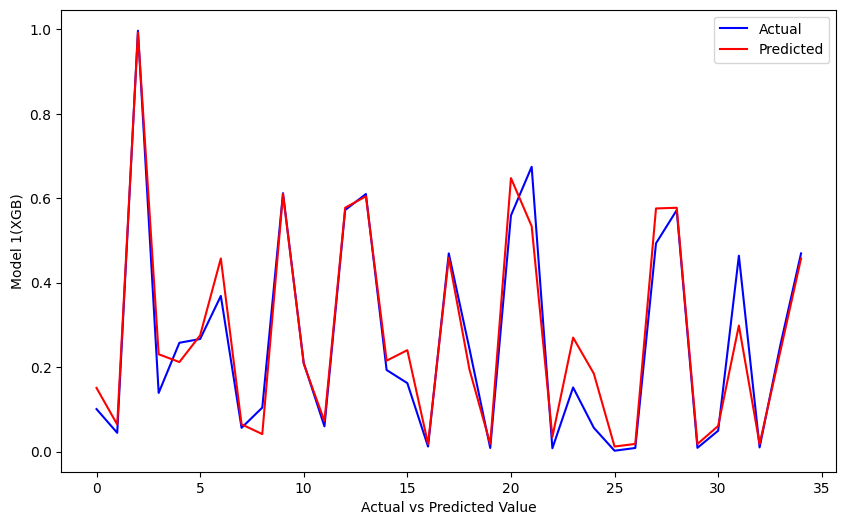

In [47]:
import matplotlib.pyplot as plt

# Assuming you have actual values in 'y_test' and predicted values in 'y_pred'

# Create a range of indices to use as x-axis
indices = range(len(y_test))

# Create a line plot for actual values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', color='blue')

# Create a line plot for predicted values
plt.plot(indices, y_pred_gb, label='Predicted', color='red')

# Set labels and legend
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Model 1(XGB)')
plt.legend(loc='best')

# Show the plot
plt.show()

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor(random_state=0)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.8626177040602787

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cross_val_score(DecisionTreeRegressor(random_state=0), X, y, cv=cv)

array([0.91378316, 0.89382431, 0.8952144 , 0.90754872, 0.84337443])

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a LinearRegression instance
dt_clf = DecisionTreeRegressor(random_state=0)

# Fit the Linear Regression model to the training data
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = gb_clf.predict(X_test)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Print the R² and RMSE scores
print("R-squared (R²) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²) Score: 0.9412868910128721
Root Mean Squared Error (RMSE): 0.06062790210810398


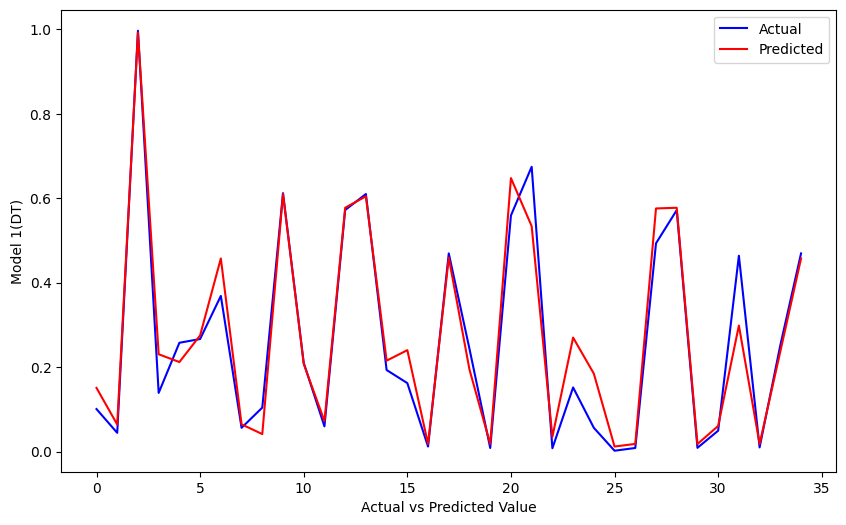

In [51]:
import matplotlib.pyplot as plt

# Assuming you have actual values in 'y_test' and predicted values in 'y_pred'

# Create a range of indices to use as x-axis
indices = range(len(y_test))

# Create a line plot for actual values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', color='blue')

# Create a line plot for predicted values
plt.plot(indices, y_pred_dt, label='Predicted', color='red')

# Set labels and legend
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Model 1(DT)')
plt.legend(loc='best')

# Show the plot
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from tabulate import tabulate

# Create instances of regression models
lr_clf = LinearRegression()
rf_clf = RandomForestRegressor(random_state=0)
gb_clf = GradientBoostingRegressor(random_state=0)
dt_clf = DecisionTreeRegressor(random_state=0)

# Fit the models to the training data
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)

# Calculate R-squared (R²) scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE) scores
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Create a table
table = [
    ["Algorithm", "Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    ["R-squared (R²)", r2_lr, r2_rf, r2_gb, r2_dt],
    ["RMSE", rmse_lr, rmse_rf, rmse_gb, rmse_dt]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒════════════════╤═════════════════════╤═════════════════╤═════════════════════╤═════════════════╕
│ Algorithm      │   Linear Regression │   Random Forest │   Gradient Boosting │   Decision Tree │
╞════════════════╪═════════════════════╪═════════════════╪═════════════════════╪═════════════════╡
│ R-squared (R²) │            0.912252 │       0.917121  │           0.941287  │       0.862618  │
├────────────────┼─────────────────────┼─────────────────┼─────────────────────┼─────────────────┤
│ RMSE           │            0.074118 │       0.0720323 │           0.0606279 │       0.0927407 │
╘════════════════╧═════════════════════╧═════════════════╧═════════════════════╧═════════════════╛


In [53]:
import pandas as pd

# Create the table as a list of lists
table = [
    ["Algorithm", "Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    ["R-squared (R²)", r2_lr, r2_rf, r2_gb, r2_dt],
    ["RMSE", rmse_lr, rmse_rf, rmse_gb, rmse_dt],
    ["NSE", nse_lr, nse_rf, nse_gb, nse_dt]
]

# Convert the table to a DataFrame
df = pd.DataFrame(table[1:], columns=table[0])

# Save the DataFrame to a CSV file
df.to_csv('regression_scores2.csv', index=False)


## Model 3 (TDS+EC)

In [54]:
X = df2.drop(['Salinity(%)', 'DO(mg/l)', 'TS(mg/l)'],axis='columns')   #input
y = df2['Salinity(%)'] 

In [55]:
X.head()

,EC(µS/cm),TDS(mg/l)
0,0.492862,0.459217
1,0.481577,0.448571
2,0.544443,0.507216
3,0.514802,0.479517
4,0.635255,0.591844


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from tabulate import tabulate

# Create instances of regression models
lr_clf = LinearRegression()
rf_clf = RandomForestRegressor(random_state=0)
gb_clf = GradientBoostingRegressor(random_state=0)
dt_clf = DecisionTreeRegressor(random_state=0)

# Fit the models to the training data
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)

# Calculate R-squared (R²) scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE) scores
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Create a table
table = [
    ["Algorithm", "Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    ["R-squared (R²)", r2_lr, r2_rf, r2_gb, r2_dt],
    ["RMSE", rmse_lr, rmse_rf, rmse_gb, rmse_dt]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒════════════════╤═════════════════════╤═════════════════╤═════════════════════╤═════════════════╕
│ Algorithm      │   Linear Regression │   Random Forest │   Gradient Boosting │   Decision Tree │
╞════════════════╪═════════════════════╪═════════════════╪═════════════════════╪═════════════════╡
│ R-squared (R²) │           0.906727  │       0.915662  │           0.912768  │       0.869639  │
├────────────────┼─────────────────────┼─────────────────┼─────────────────────┼─────────────────┤
│ RMSE           │           0.0764158 │       0.0726635 │           0.0738995 │       0.0903398 │
╘════════════════╧═════════════════════╧═════════════════╧═════════════════════╧═════════════════╛


In [58]:
import pandas as pd

# Create the table as a list of lists
table = [
    ["Algorithm", "Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    ["R-squared (R²)", r2_lr, r2_rf, r2_gb, r2_dt],
    ["RMSE", rmse_lr, rmse_rf, rmse_gb, rmse_dt],
    ["NSE", nse_lr, nse_rf, nse_gb, nse_dt]
]

# Convert the table to a DataFrame
df = pd.DataFrame(table[1:], columns=table[0])

# Save the DataFrame to a CSV file
df.to_csv('regression_scores3.csv', index=False)


## Model 4 (TDS)

In [59]:
X = df2.drop(['Salinity(%)', 'DO(mg/l)', 'TS(mg/l)', 'EC(µS/cm)'],axis='columns')   #input
y = df2['Salinity(%)'] 

In [60]:
X.head()

,TDS(mg/l)
0,0.459217
1,0.448571
2,0.507216
3,0.479517
4,0.591844


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from tabulate import tabulate

# Create instances of regression models
lr_clf = LinearRegression()
rf_clf = RandomForestRegressor(random_state=0)
gb_clf = GradientBoostingRegressor(random_state=0)
dt_clf = DecisionTreeRegressor(random_state=0)

# Fit the models to the training data
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)

# Calculate R-squared (R²) scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE) scores
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Create a table
table = [
    ["Algorithm", "Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    ["R-squared (R²)", r2_lr, r2_rf, r2_gb, r2_dt],
    ["RMSE", rmse_lr, rmse_rf, rmse_gb, rmse_dt]
]

# Display the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒════════════════╤═════════════════════╤═════════════════╤═════════════════════╤═════════════════╕
│ Algorithm      │   Linear Regression │   Random Forest │   Gradient Boosting │   Decision Tree │
╞════════════════╪═════════════════════╪═════════════════╪═════════════════════╪═════════════════╡
│ R-squared (R²) │           0.908605  │       0.916509  │           0.917212  │       0.897011  │
├────────────────┼─────────────────────┼─────────────────┼─────────────────────┼─────────────────┤
│ RMSE           │           0.0756424 │       0.0722978 │           0.0719926 │       0.0802971 │
╘════════════════╧═════════════════════╧═════════════════╧═════════════════════╧═════════════════╛


In [63]:
import pandas as pd

# Create the table as a list of lists
table = [
    ["Algorithm", "Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    ["R-squared (R²)", r2_lr, r2_rf, r2_gb, r2_dt],
    ["RMSE", rmse_lr, rmse_rf, rmse_gb, rmse_dt],
    ["NSE", nse_lr, nse_rf, nse_gb, nse_dt]
]

# Convert the table to a DataFrame
df = pd.DataFrame(table[1:], columns=table[0])

# Save the DataFrame to a CSV file
df.to_csv('regression_scores4.csv', index=False)
